In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [80]:
model = "/content/gdrive/MyDrive/MURA-v1.1/newxray100.h5"

In [81]:
image = "/content/gdrive/MyDrive/MURA-v1.1/train/XR_HAND/patient10155/study1_negative/image1.png"

In [82]:
# load the image
image = cv2.imread(image)
orig = image.copy()
# pre-process the image for classification
image = cv2.resize(image, (150, 150))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [83]:
# load the trained convolutional neural network
print("[INFO] loading network...")
model = load_model(model)
# classify the input image
result = model.predict(image)

[INFO] loading network...


In [84]:
print(result)

[[0.3316731]]


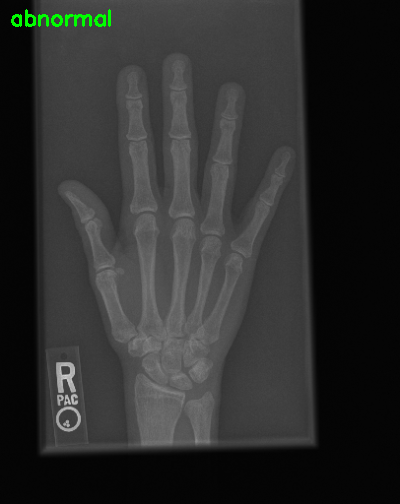

-1

In [85]:
# build the label
label = "normal" if result < 0.3 else "abnormal"
# proba = santa if santa > notSanta else notSanta
label = "{}".format(label)
# draw the label on the image
output = imutils.resize(orig, width=400)
cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 255, 0), 2)
# show the output image
cv2_imshow(output)
cv2.waitKey(0)